## 05.10.월 빅데이터 처리3

## Random Forest      IRIS 데이터 분류

### imbalance data의 학습

In [1]:
## 빅데이터 처리 ppt 179p
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
## iris 데이터 불러오기
iris = load_iris()

## train, test data 설정하기
# 데이터의 시작부터 끝에서 30번쨰 미만까지
x_train = iris.data[:-30]
y_train = iris.target[:-30]
# 데이터에서 마지막 30번째부터 끝까지 
x_test = iris.data[-30:]
y_test = iris.target[-30:]

In [3]:
## imbalance data : 한쪽에 치우친 데이터
# 2의 비율이 많음을 확인할 수 있다.
# 원래는  0, 1, 2의 비율이 비슷해야한다. 
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [4]:
# 0, 1, 2의 비율이 비슷하지않고 전부 2로 나온다
print(y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
## Sklearn.ensemble 모듈은 분류, 회귀 및 이상 탐지
from sklearn.ensemble import RandomForestClassifier

In [6]:
## Random Forest 분류기 생성
# tree의 개수 Random Forest 분류 모듈 생성
rfc = RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(n_estimators=10)

In [7]:
rfc.fit(x_train, y_train)
# test data를 입력해 target data를 예측
prediction = rfc.predict(x_test)
# 예측 결과값과 진짜값을 비교하기
print(prediction == y_test)

[ True False  True False  True  True False False  True False  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [8]:
## 정확도 측정1
rfc.score(x_test, y_test)

0.7333333333333333

In [9]:
## 정확도 측정2
from sklearn.metrics import classification_report
print('Accuracy is :', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))

Accuracy is : 0.7333333333333333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.73      0.85        30

    accuracy                           0.73        30
   macro avg       0.50      0.37      0.42        30
weighted avg       1.00      0.73      0.85        30



C:\Users\Admin\anaconda3\envs\spark_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\spark_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\spark_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### balance data의 학습

In [10]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
# imbalance data
print(y_test)
# balance data
# size를 8:2로 지정해주니 비율이 비슷해져서 나누어졌다.
print(Y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 2 0 2 0 0 2 2 1 1 0 1 1 0 0 0 0 2 0 2 1 0 1 1 1 2 1 0 2 0]


In [11]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
prediction_1 = clf.predict(X_test)

print('Accuracy is :', accuracy_score(Y_test, prediction_1))
print(classification_report(Y_test, prediction_1))

Accuracy is : 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



#### Random Forest 분류기 성능 높이는 방법

In [12]:
## 성능 높이기
# n_estimators= 200 : tree를 200개로 지정하기, 기본값은 100개
# max_features= 4 : 랜덤하게 선택할 칸의 수, 기본값은 루트(독립변수)
# oob_score = True : 중요도 확인하기
clf_2 = RandomForestClassifier(n_estimators= 200,
                            max_features= 4,
                            oob_score = True)
clf_2.fit(X_train, Y_train)
prediction_2 = clf_2.predict(X_test)

print('Accuracy is :', accuracy_score(prediction_2, Y_test))
print(classification_report(prediction_2, Y_test))

Accuracy is : 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [13]:
## 중요도 확인하기
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.011253012147965103
sepal width (cm) 0.01303022184692914
petal length (cm) 0.6307309377265223
petal width (cm) 0.34498582827858343


## Spark Random Forest

In [14]:
from sklearn.datasets import load_iris
import pandas as pd

In [15]:
## iris데이터 불러오기
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
## iris 독립변수 조회하기
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
## iris 독립변수 컬럼명 조회하기
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
## iris 종속변수 조회하기
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
## DataFrame 생성하기
pandas_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
pandas_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
## pandas_df에 target 컬럼을 추가하기
pandas_df['target'] = iris['target']

In [41]:
##pandas_df를 spark DataFrame으로 변환해서 df에 넣기
df= spark.createDataFrame(pandas_df)
df

DataFrame[sepal length (cm): double, sepal width (cm): double, petal length (cm): double, petal width (cm): double, target: bigint]

In [42]:
## df의 타입 확인하기
# Spark DataFrame임을 확인하기
type(df)

pyspark.sql.dataframe.DataFrame

In [43]:
## df 데이터 출력
# 눈에는 하나같지만, Spark는 나눠서 저장된다.
df.show()

+-----------------+----------------+-----------------+----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|
+-----------------+----------------+-----------------+----------------+------+
|              5.1|             3.5|              1.4|             0.2|     0|
|              4.9|             3.0|              1.4|             0.2|     0|
|              4.7|             3.2|              1.3|             0.2|     0|
|              4.6|             3.1|              1.5|             0.2|     0|
|              5.0|             3.6|              1.4|             0.2|     0|
|              5.4|             3.9|              1.7|             0.4|     0|
|              4.6|             3.4|              1.4|             0.3|     0|
|              5.0|             3.4|              1.5|             0.2|     0|
|              4.4|             2.9|              1.4|             0.2|     0|
|              4.9|             3.1|              1.

In [44]:
# df의 컬럼 타입 조회하기
df.schema

StructType(List(StructField(sepal length (cm),DoubleType,true),StructField(sepal width (cm),DoubleType,true),StructField(petal length (cm),DoubleType,true),StructField(petal width (cm),DoubleType,true),StructField(target,LongType,true)))

In [45]:
from pyspark.ml.feature import VectorAssembler

In [46]:
# iris데이터의 독립변수 조회
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
## 독립변수를 합치기(VectorAssembler)
# 독립변수를 features에 합치고 features 컬럼을 생성
# VectorAssembler할 객체
assembler = VectorAssembler(inputCols = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
                           outputCol = 'features')

In [48]:
## 컬럼을 생성하고 확인하기
assembler_df = assembler.transform(df)
assembler_df.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              5.1|             3.5|              1.4|             0.2|     0|[5.1,3.5,1.4,0.2]|
|              4.9|             3.0|              1.4|             0.2|     0|[4.9,3.0,1.4,0.2]|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2]|
|              5.0|             3.6|              1.4|             0.2|     0|[5.0,3.6,1.4,0.2]|
|              5.4|             3.9|              1.7|             0.4|     0|[5.4,3.9,1.7,0.4]|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3]|
|              5.0|           

In [49]:
## train, test data 나누기
# 0.8, 0.2로 80% ,20%로 나눠짐
# trainingData : 80%, testData : 20%
(trainingData, testData) = assembler_df.randomSplit([0.8, 0.2])

In [50]:
## trainingData 확인하기
trainingData.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              4.3|             3.0|              1.1|             0.1|     0|[4.3,3.0,1.1,0.1]|
|              4.4|             2.9|              1.4|             0.2|     0|[4.4,2.9,1.4,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2]|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3]|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2]|
|              4.8|             3.0|              1.4|             0.1|     0|[4.8,3.0,1.4,0.1]|
|              4.9|             3.0|              1.4|             0.2|     0|[4.9,3.0,1.4,0.2]|
|              4.9|           

In [51]:
## testData 확인하기
testData.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              4.8|             3.4|              1.6|             0.2|     0|[4.8,3.4,1.6,0.2]|
|              4.7|             3.2|              1.6|             0.2|     0|[4.7,3.2,1.6,0.2]|
|              4.6|             3.2|              1.4|             0.2|     0|[4.6,3.2,1.4,0.2]|
|              4.9|             3.6|              1.4|             0.1|     0|[4.9,3.6,1.4,0.1]|
|              5.0|             3.5|              1.6|             0.6|     0|[5.0,3.5,1.6,0.6]|
|              5.1|             3.8|              1.6|             0.2|     0|[5.1,3.8,1.6,0.2]|
|              5.0|             2.0|              3.5|             1.0|     1|[5.0,2.0,3.5,1.0]|
|              6.0|           

In [52]:
from pyspark.ml.classification import RandomForestClassifier

In [53]:
## RandomForestClassifier 객체 생성하기
# featuresCol = 'features' : 독립변수는 features 컬럼에 저장하기
# labelCol = 'target' : 종속변수는 target 컬럼에 저장하기
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'target')

In [54]:
## Decision Tree 생성하기
# fit을 사용해야지 생성된다.
rfModel = rf.fit(trainingData)

In [55]:
rfModel

RandomForestClassificationModel (uid=RandomForestClassifier_bb728fc9b36e) with 20 trees

In [56]:
## 예측값 구하기
prediction = rfModel.transform(testData)

In [57]:
## 예측값 확인하기
prediction.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|       rawPrediction|         probability|prediction|
+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|              4.8|             3.4|              1.6|             0.2|     0|[4.8,3.4,1.6,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              4.7|             3.2|              1.6|             0.2|     0|[4.7,3.2,1.6,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              4.6|             3.2|              1.4|             0.2|     0|[4.6,3.2,1.4,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              4.9|             3.6|              1.4|             0.1|     0|[4.9,3.6,1.4,0.1]|    

In [58]:
## 진짜값과 예측값 조회하기
prediction['target', 'prediction'].show()

+------+----------+
|target|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       2.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     2|       2.0|
|     2|       2.0|
+------+----------+
only showing top 20 rows



In [59]:
## 컬럼값이 같은 레코드를 right_predict 객체에 주기
right_predict = prediction.filter(prediction.target == prediction.prediction)

In [60]:
## right_predict 확인하기
right_predict.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|       rawPrediction|         probability|prediction|
+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|              4.8|             3.4|              1.6|             0.2|     0|[4.8,3.4,1.6,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              4.7|             3.2|              1.6|             0.2|     0|[4.7,3.2,1.6,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              4.6|             3.2|              1.4|             0.2|     0|[4.6,3.2,1.4,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              4.9|             3.6|              1.4|             0.1|     0|[4.9,3.6,1.4,0.1]|    

In [61]:
## 진짜값과 예측값 컬럼 확인하기
# target = 진짜값, prediction = 예측값
right_predict['target', 'prediction'].show()

+------+----------+
|target|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
+------+----------+
only showing top 20 rows



In [62]:
# target컬럼과 prediction컬럼의 값이 같은 줄 수 조회
right_predict.count()

24

In [63]:
# 전체 예측값 개수 조회
prediction.count()

25

In [64]:
# 정확도 계산하기
right_predict.count() / prediction.count() 

0.96

In [66]:
from dtreeviz import trees
from dtreeviz.models.spark_decision_tree import ShadowSparkTree

In [68]:
## 독립변수 조회
trainingData['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].show()

+-----------------+----------------+-----------------+----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|
+-----------------+----------------+-----------------+----------------+
|              4.3|             3.0|              1.1|             0.1|
|              4.4|             2.9|              1.4|             0.2|
|              4.6|             3.1|              1.5|             0.2|
|              4.6|             3.4|              1.4|             0.3|
|              4.7|             3.2|              1.3|             0.2|
|              4.8|             3.0|              1.4|             0.1|
|              4.9|             3.0|              1.4|             0.2|
|              4.9|             3.1|              1.5|             0.1|
|              5.0|             3.4|              1.5|             0.2|
|              5.0|             3.6|              1.4|             0.2|
|              5.1|             3.5|              1.4|          

In [69]:
## 종속변수 조회
trainingData[['target']].show()

+------+
|target|
+------+
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
+------+
only showing top 20 rows



In [70]:
## RandomForest에 포함된 Decision Tree객체를 조회하기
rfModel.trees

[DecisionTreeClassificationModel (uid=dtc_d233f31fa8fa) of depth 4 with 13 nodes,
 DecisionTreeClassificationModel (uid=dtc_22e7ad1885ea) of depth 5 with 15 nodes,
 DecisionTreeClassificationModel (uid=dtc_78415af02786) of depth 4 with 9 nodes,
 DecisionTreeClassificationModel (uid=dtc_a597a5e68ddb) of depth 5 with 19 nodes,
 DecisionTreeClassificationModel (uid=dtc_9f1a0e28156b) of depth 3 with 7 nodes,
 DecisionTreeClassificationModel (uid=dtc_a19715ca92b9) of depth 5 with 13 nodes,
 DecisionTreeClassificationModel (uid=dtc_9807fe16cab8) of depth 4 with 11 nodes,
 DecisionTreeClassificationModel (uid=dtc_f8c28cb02350) of depth 5 with 13 nodes,
 DecisionTreeClassificationModel (uid=dtc_2145d276f3de) of depth 3 with 9 nodes,
 DecisionTreeClassificationModel (uid=dtc_542d198478ce) of depth 5 with 11 nodes,
 DecisionTreeClassificationModel (uid=dtc_cc0e39fee364) of depth 5 with 15 nodes,
 DecisionTreeClassificationModel (uid=dtc_6916e66edc45) of depth 2 with 5 nodes,
 DecisionTreeClassif

In [71]:
# Decision Tree 중 첫번째 Decision Tree 내용 조회하기
print(rfModel.trees[0].toDebugString)

DecisionTreeClassificationModel (uid=dtc_d233f31fa8fa) of depth 4 with 13 nodes
  If (feature 2 <= 2.45)
   Predict: 0.0
  Else (feature 2 > 2.45)
   If (feature 2 <= 4.95)
    If (feature 3 <= 1.65)
     Predict: 1.0
    Else (feature 3 > 1.65)
     If (feature 0 <= 4.95)
      Predict: 2.0
     Else (feature 0 > 4.95)
      Predict: 1.0
   Else (feature 2 > 4.95)
    If (feature 3 <= 1.75)
     If (feature 3 <= 1.65)
      Predict: 2.0
     Else (feature 3 > 1.65)
      Predict: 1.0
    Else (feature 3 > 1.75)
     Predict: 2.0



In [72]:
## train data 조회하기
trainingData.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              4.3|             3.0|              1.1|             0.1|     0|[4.3,3.0,1.1,0.1]|
|              4.4|             2.9|              1.4|             0.2|     0|[4.4,2.9,1.4,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2]|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3]|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2]|
|              4.8|             3.0|              1.4|             0.1|     0|[4.8,3.0,1.4,0.1]|
|              4.9|             3.0|              1.4|             0.2|     0|[4.9,3.0,1.4,0.2]|
|              4.9|           

In [77]:
## 시각화를 위해서 Pandas DataFrame으로 변환하기
dataset = trainingData.toPandas()
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,features
0,4.3,3.0,1.1,0.1,0,"[4.3, 3.0, 1.1, 0.1]"
1,4.4,2.9,1.4,0.2,0,"[4.4, 2.9, 1.4, 0.2]"
2,4.6,3.1,1.5,0.2,0,"[4.6, 3.1, 1.5, 0.2]"
3,4.6,3.4,1.4,0.3,0,"[4.6, 3.4, 1.4, 0.3]"
4,4.7,3.2,1.3,0.2,0,"[4.7, 3.2, 1.3, 0.2]"
...,...,...,...,...,...,...
120,6.8,3.2,5.9,2.3,2,"[6.8, 3.2, 5.9, 2.3]"
121,6.9,3.1,5.1,2.3,2,"[6.9, 3.1, 5.1, 2.3]"
122,7.2,3.0,5.8,1.6,2,"[7.2, 3.0, 5.8, 1.6]"
123,7.4,2.8,6.1,1.9,2,"[7.4, 2.8, 6.1, 1.9]"


In [78]:
dataset = dataset[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)', 'target']]
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.3,3.0,1.1,0.1,0
1,4.4,2.9,1.4,0.2,0
2,4.6,3.1,1.5,0.2,0
3,4.6,3.4,1.4,0.3,0
4,4.7,3.2,1.3,0.2,0
...,...,...,...,...,...
120,6.8,3.2,5.9,2.3,2
121,6.9,3.1,5.1,2.3,2
122,7.2,3.0,5.8,1.6,2
123,7.4,2.8,6.1,1.9,2


In [81]:
## Random Forest에 포함된 첫번째 Decision Tree의 출력 정보 설정하기
spark_dtree = ShadowSparkTree(
                rfModel.trees[0],
                dataset[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
                dataset['target'],
                feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
                target_name = 'target',
                class_names = ['setosa', 'versicolor', 'virginica']
)

In [82]:
spark_dtree

In [84]:
# Graphviz path 설정하기
import os
os.environ['PATH'] += os.pathsep + "C:/Program Files\Graphviz\bin"

In [85]:
# path 설정 조회하기
os.environ['PATH']

'C:\\Users\\Admin\\anaconda3\\envs\\spark_env;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Scripts;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files\\Graphviz\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\

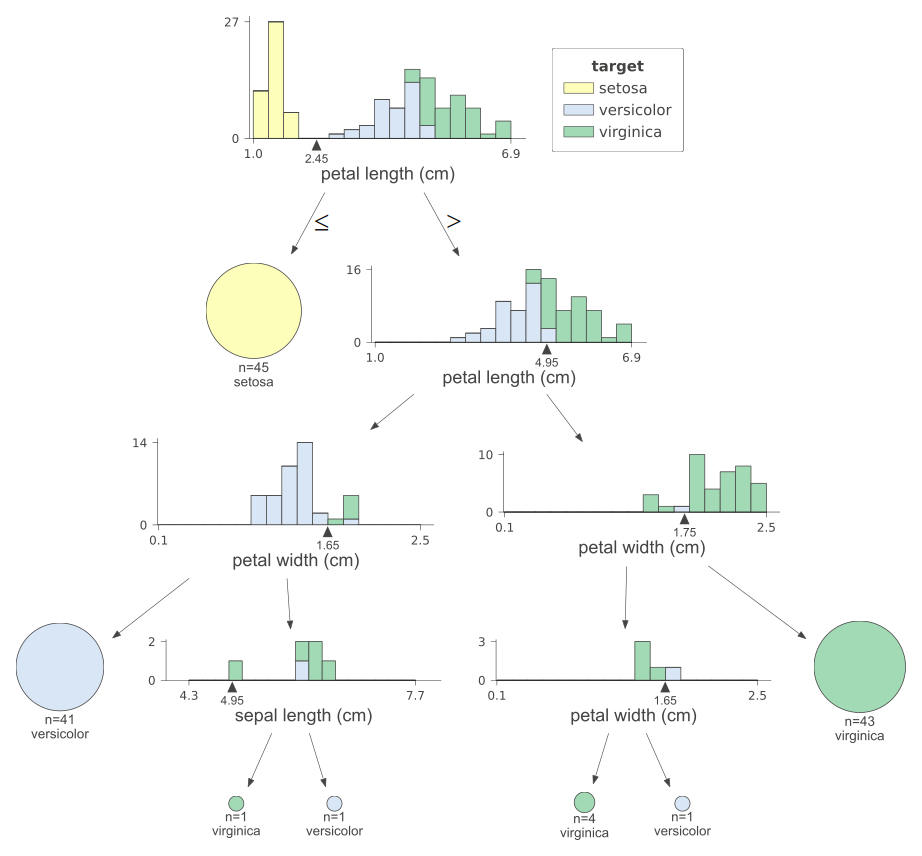

In [86]:
## 시각화 조회하기
trees.dtreeviz(spark_dtree, scale = 2.0)